In [101]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import utils


In [102]:
import matplotlib.pyplot as plt
import os


In [103]:
# Load dataset
dataset = pd.read_csv(r'C:\Users\adars\KDD\project1\LassoRegression\LassoForwardSelectionDataSetForModelling.csv')  
dataset.head()

,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Cereal yield (kg per hectare),Urban population (% of total),GDP per capita (current US$),"Merchandise exports by the reporting economy, residual (% of total merchandise exports)",Permanent cropland (% of land area),"Merchandise imports by the reporting economy, residual (% of total merchandise imports)",Population density (people per sq. km of land area),Agricultural land (% of land area),Arable land (hectares per person),Arable land (% of land area),CO2 emissions from solid fuel consumption (kt),Merchandise trade (% of GDP),"Life expectancy at birth, total (years)",Year,CountryName,MeanLifeExpetancyOverall,MeanLifeExpetancyForYear,AboveAverageLifeExpectancyOverall,AboveAverageLifeExpectancyByYear
0,145.3210,1082.838,9.426,82.231395,44.252874,0.111816,57.122507,14.901579,58.010906,0.801756,11.947431,300.694,23.499999,34.092878,1964,Afghanistan,64.193563,55.937218,False,False
1,46.6478,1323.715,83.110,2127.165739,9.663118,0.021999,2.713909,1.453601,61.050597,3.168264,4.605392,67190.441,26.822615,70.880976,1964,Australia,64.193563,55.937218,True,True
2,56.3066,2621.710,64.962,1269.412583,11.543540,0.811334,8.977475,87.476399,48.244127,0.229381,20.065391,18951.056,36.085123,69.921951,1964,Austria,64.193563,55.937218,True,True
3,88.5072,529.302,11.801,104.323759,1.526718,0.709471,9.385113,22.936875,13.320326,0.378911,8.691025,0.000,16.410000,39.136854,1964,Benin,64.193563,55.937218,False,False
4,100.5586,795.060,37.957,203.601251,2.370500,0.126465,3.692906,3.683980,27.580541,0.336018,1.237884,3.667,24.452858,43.430220,1964,Bolivia,64.193563,55.937218,False,False


In [104]:
# Split the dataset into features and obs
forwardSelection = pd.read_csv('../../LassoRegression/ForwardSelectionVia5FoldCV.csv')

forwardSelection = forwardSelection["0"].tolist()

X = dataset[dataset.columns.intersection(forwardSelection)] 



In [105]:
y = dataset["Life expectancy at birth, total (years)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [106]:
X.head()

,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Urban population (% of total),GDP per capita (current US$),"Merchandise exports by the reporting economy, residual (% of total merchandise exports)",Permanent cropland (% of land area),Population density (people per sq. km of land area),Arable land (hectares per person),Arable land (% of land area),CO2 emissions from solid fuel consumption (kt),Merchandise trade (% of GDP)
0,145.3210,9.426,82.231395,44.252874,0.111816,14.901579,0.801756,11.947431,300.694,23.499999
1,46.6478,83.110,2127.165739,9.663118,0.021999,1.453601,3.168264,4.605392,67190.441,26.822615
2,56.3066,64.962,1269.412583,11.543540,0.811334,87.476399,0.229381,20.065391,18951.056,36.085123
3,88.5072,11.801,104.323759,1.526718,0.709471,22.936875,0.378911,8.691025,0.000,16.410000
4,100.5586,37.957,203.601251,2.370500,0.126465,3.683980,0.336018,1.237884,3.667,24.452858


In [107]:
X.head()

,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Urban population (% of total),GDP per capita (current US$),"Merchandise exports by the reporting economy, residual (% of total merchandise exports)",Permanent cropland (% of land area),Population density (people per sq. km of land area),Arable land (hectares per person),Arable land (% of land area),CO2 emissions from solid fuel consumption (kt),Merchandise trade (% of GDP)
0,145.3210,9.426,82.231395,44.252874,0.111816,14.901579,0.801756,11.947431,300.694,23.499999
1,46.6478,83.110,2127.165739,9.663118,0.021999,1.453601,3.168264,4.605392,67190.441,26.822615
2,56.3066,64.962,1269.412583,11.543540,0.811334,87.476399,0.229381,20.065391,18951.056,36.085123
3,88.5072,11.801,104.323759,1.526718,0.709471,22.936875,0.378911,8.691025,0.000,16.410000
4,100.5586,37.957,203.601251,2.370500,0.126465,3.683980,0.336018,1.237884,3.667,24.452858


In [151]:
kreg = KNeighborsRegressor(n_neighbors = 3)
kreg.fit(X_train.values, y_train.values)

KNeighborsRegressor(n_neighbors=3)

In [152]:
y_pred = kreg.predict(X_test)

In [153]:
y_pred = kreg.predict(X_test.values)

In [154]:
print('Accuracy training : {:.3f}'.format(kreg.score(X_train, y_train)))
print('Accuracy testing : {:.3f}'.format(kreg.score(X_test, y_test)))

Accuracy training : 0.919
Accuracy testing : 0.829


In [134]:
residuals = y_pred-y_test
residuals
residuals.shape, X_test.shape

((2066,), (2066, 10))

In [135]:
X_test.iloc[:,0]

2304     47.2200
3621     38.4210
5821      9.9630
2707     32.1248
2596    106.6170
          ...   
3737     16.5984
679     147.3200
2955     22.6162
4041     96.3600
1211     52.2766
Name: Adolescent fertility rate (births per 1,000 women ages 15-19), Length: 2066, dtype: float64

In [136]:
X_test.columns[0]


'Adolescent fertility rate (births per 1,000 women ages 15-19)'

In [137]:
def residual(x,y,title,folder):
    isExist = os.path.exists(folder)

    if not isExist:

      # Create a new directory because it does not exist 
      os.makedirs(folder)
    f = plt.figure()
    f = plt.scatter(x, y)
    plt.title(title)
    plt.savefig(folder + '/' + title + '.png', bbox_inches='tight', dpi=300)

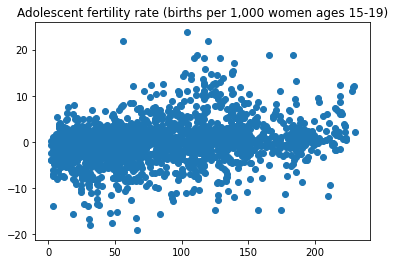

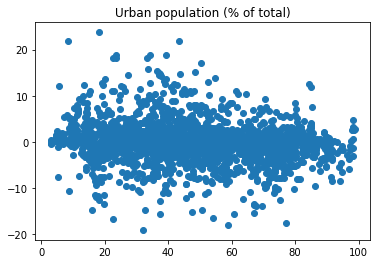

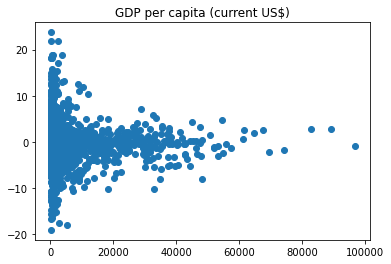

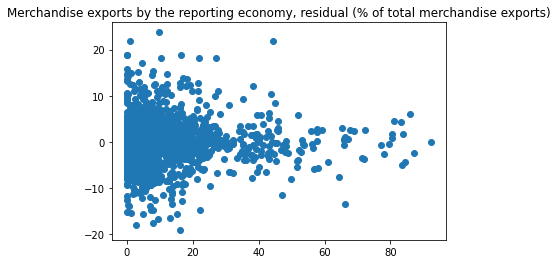

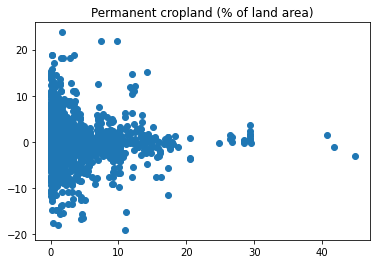

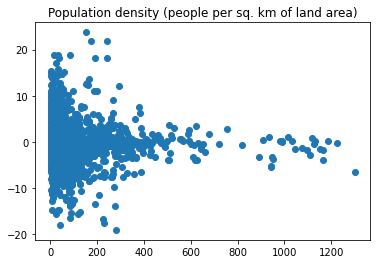

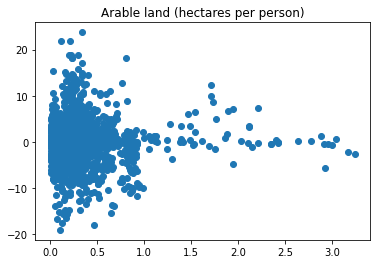

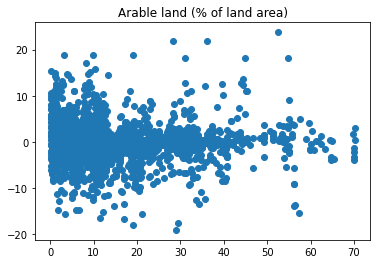

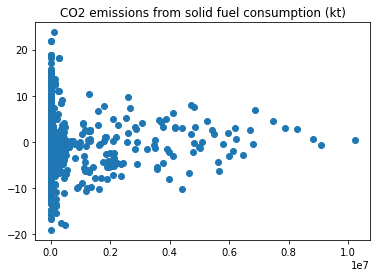

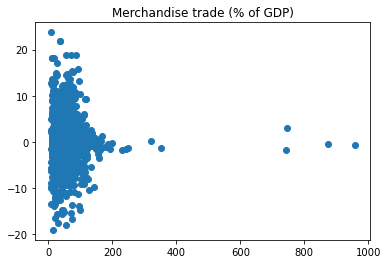

In [138]:
for index in range(0,10):
    residual(X_test.iloc[:,index], residuals,X_test.columns[index],'KNNRegression')